# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
student_data = pd.DataFrame({'X':[17, 51, 27, 21, 36, 48, 19, 26, 54, 30],
                             'Y':[1, 1, 5, 9, 4, 2, 9, 6, 0, 3]})

Draw a dispersion diagram (scatter plot) for the data.

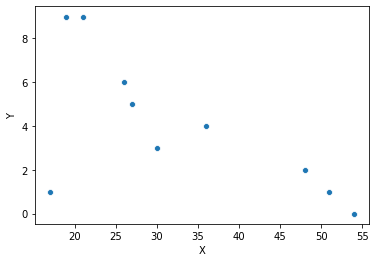

In [3]:
# Your code here.
sns.scatterplot(data=student_data, x=student_data.X , y=student_data.Y)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [4]:
'Well, it does look like it has some relationship/correlation. It goes better if you take some outliers: (17,1) '

'Well, it does look like it has some relationship/correlation. It goes better if you take some outliers: (17,1) '

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
# Your response here.
cova = student_data.cov()
corr = student_data.corr()

corcova = cova.join(corr, lsuffix='_cova',rsuffix='_corr').loc[['X'],['Y_cova','Y_corr']]
corcova

,Y_cova,Y_corr
X,-29.666667,-0.670109


In [6]:
"""
Covariance values are not standardized. Therefore, the covariance can range from negative infinity to positive 
infinity (in our case, -29,667). Thus, the value for a perfect linear relationship depends on the data. 
Because the data are not standardized, it is difficult to determine the strength of the relationship between 
the variables.

Correlation coefficients are standardized. Thus, a perfect linear relationship results in a coefficient of 1
(in our case, -0.6701). The correlation measures both the strength and direction of the linear relationship 
between two variables.

"""

'Add your responses as comments after your code.'

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

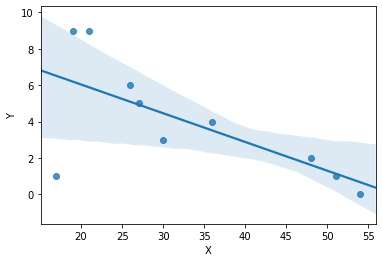

In [7]:
sns.regplot(x=student_data.X,y=student_data.Y)

In [8]:
X = student_data.loc[:,['X']]
y = student_data.loc[:,'Y']

model = LinearRegression()
model.fit(X,y)
model.score(X,y)

0.44904589793432215

Plot your regression model on your scatter plot.

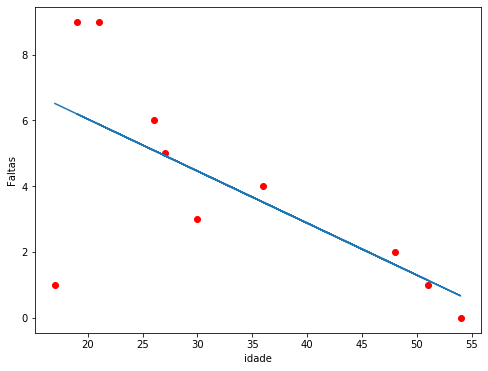

In [9]:
ypred = model.predict(X)

plt.figure(figsize=(8,6))
plt.xlabel('idade')
plt.ylabel('Faltas')
plt.scatter(X, y, color='red', label='observed')
# plot the predicted values together with the observed values
plt.plot(X, ypred, label='predicted')
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [10]:
'''
Well, the score is 0.449045, so the information given can only "explain" roughly 45% of this
system. Looking at the plot, afeter 25 years the model seems better fit to predict tardiness...
'''

'\nWell, the score is 0.449045, so the information given can only "explain" roughly 45% of this\nsystem. Looking at the plot, afeter 25 years the model seems better fit to predict tardiness...\n'

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [11]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('vehicles.csv')

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [12]:
data = vehicles.loc[:,['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG','Fuel Cost/Year', 'CO2 Emission Grams/Mile']]
data.corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


In [13]:
'''
Which variable do you think will be the most important in determining CO2 emissions?
>>> It would bei either 'Fuel Barrels/Year' or 'Fuel Cost/Year'. Those two are in fact very correlated
too

Which provides the least amount of helpful information for determining CO2 emissions?
>>> The column Year has the least amount of helpful information, because has low correlation,
compared to the others...
'''

"\nWhich variable do you think will be the most important in determining CO2 emissions?\n>>> It would bei either 'Fuel Barrels/Year' or 'Fuel Cost/Year'. Those two are in fact very correlated\ntoo\n\nWhich provides the least amount of helpful information for determining CO2 emissions?\n>>> The column Year has the least amount of helpful information, because has low correlation,\ncompared to the others...\n"

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [14]:
X = data.loc[:,['Fuel Barrels/Year']]
y = data.loc[:,'CO2 Emission Grams/Mile']

model = LinearRegression()
model.fit(X,y)
model.score(X,y)

0.9725680773391494

In [15]:
'''
We used linear regression because they have great correlation. The score is quite high, which
indicates good use of this tool
'''

'\nWe used linear regression because they have great correlation. The score is quite high, which\nindicates good use of this tool\n'

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

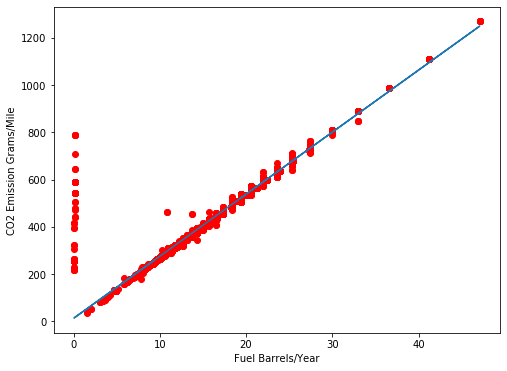

In [16]:
ypred = model.predict(X)

plt.figure(figsize=(8,6))
plt.xlabel('Fuel Barrels/Year')
plt.ylabel('CO2 Emission Grams/Mile')
plt.scatter(X, y, color='red', label='observed')
# plot the predicted values together with the observed values
plt.plot(X, ypred, label='predicted')
plt.show()

In [17]:
import statsmodels.api as sm

# to calculate intercepts, statsmodel requires you to 'add a constant' (column of ones on your dataframe)
X = sm.add_constant(X)

## OLS (Ordinary Least Squares) has a different standard (y comes before X)
model = sm.OLS(y,X)

## Fitting doesn't require X and y (since you already passed it beforehand)
results = model.fit()

## predict is the same
predictions = results.predict(X)

## statsmodel has some good reports
results.summary()

c:\users\vfarn\appdata\local\programs\python\python38-32\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.973
Model:                                 OLS   Adj. R-squared:                  0.973
Method:                      Least Squares   F-statistic:                 1.275e+06
Date:                     Tue, 14 Apr 2020   Prob (F-statistic):               0.00
Time:                             18:09:05   Log-Likelihood:            -1.5821e+05
No. Observations:                    35952   AIC:                         3.164e+05
Df Residuals:                        35950   BIC:                         3.164e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                12.4865      0.423     29.523      0.000      11.658      13.316
Fuel Barrels/Year    26.2836      0.023   1128.967      0.000      26.238      26.329
==============================================================================
Omnibus:                    88540.411   Durbin-Watson:                   0.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        957228555.962
Skew:                          26.696   Prob(JB):                         0.00
Kurtosis:                     800.592   Cond. No.                         74.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
"""
Fuel Barrels/Year have the highest correlation with "CO2 Emission Grams/Mile"
The model Fits really well apart from some data where "fuel Barrels/Year" is different than zero.
The R-squared is close to 1, which gives an high confidence over the model.
"""

'\nFuel Barrels/Year have the highest correlation with "CO2 Emission Grams/Mile"\nThe model Fits really well apart from some data where "fuel Barrels/Year" is different than zero.\nThe R-squared is close to 1, which gives an high confidence over the model.\n'

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [19]:
data = pd.DataFrame({'X':[1,3,4,6,8,9,11,14],'Y':[1,2,4,4,5,7,8,13]})

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

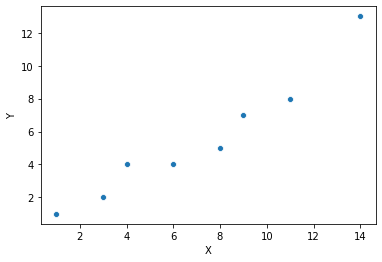

In [20]:
sns.scatterplot(x=data.X,y=data.Y)

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [21]:
"""
Yes, there seems to be some correlation...
"""
data.corr()

,X,Y
X,1.00000,0.96523
Y,0.96523,1.00000


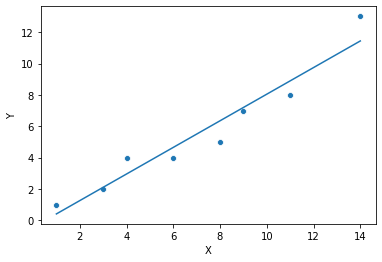

In [22]:
model = LinearRegression()
X = data.loc[:,['X']]
y = data.Y
model.fit(X,y)
y_pred = model.predict(X)
score1 = round(model.score(X,y),4)
corr1 = round(data.corr().iloc[1,0],4)

sns.scatterplot(x=data.X,y=data.Y)
sns.lineplot(x=data.X, y=y_pred)
plt.show()

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

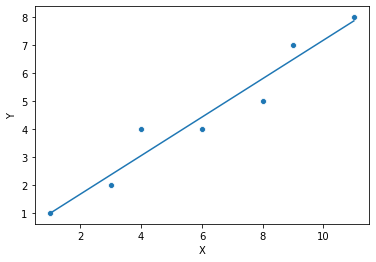

In [23]:
model = LinearRegression()
#maybe removing the last row of the dataframe will help a little bit more
model2 = LinearRegression()
X = data.loc[0:6,['X']]
y = data.Y[0:-1]
model.fit(X,y)
y_pred = model.predict(X)
score2 = round(model.score(X,y),4)
corr2 = round(data.loc[0:6].corr().iloc[1,0],4)

sns.scatterplot(x=data.X[0:-1],y=data.Y[0:-1])
sns.lineplot(x=data.X[0:-1], y=y_pred)
plt.show()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [24]:
change1 = round(-1*(corr1 - corr2)/corr1,3)
change2 = round(-1*(score1 - score2)/score1,3)
print(f'correlation change: from {corr1} to {corr2}, which is a {change1} %change')
print(f'score change: from {score1} to {score2}, which is a {change2} %change')
"""
in terms of correlation and score predict, it didnt change much...
in fact, the "outlier" is not that of a outlier.
"""

correlation change: from 0.9652 to 0.9713, which is a 0.006 %change
score change: from 0.9317 to 0.9434, which is a 0.013 %change


'\nin terms of correlation and score predict, it didnt change much...\nin fact, the "outlier" is not that of a outlier.\n'